In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("creditcard.csv")
df = df.dropna()

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df2 = df.drop("Class", axis=1).drop("Time", axis=1).drop("Amount", axis=1)
feature_col = df2.columns.tolist()
print(feature_col)
target_class = "Class"

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [ ]:
X = df[feature_col]
y = df[target_class]
print(X)

               V1         V2        V3  ...       V26       V27       V28
0       -1.359807  -0.072781  2.536347  ... -0.189115  0.133558 -0.021053
1        1.191857   0.266151  0.166480  ...  0.125895 -0.008983  0.014724
2       -1.358354  -1.340163  1.773209  ... -0.139097 -0.055353 -0.059752
3       -0.966272  -0.185226  1.792993  ... -0.221929  0.062723  0.061458
4       -1.158233   0.877737  1.548718  ...  0.502292  0.219422  0.215153
...           ...        ...       ...  ...       ...       ...       ...
284802 -11.881118  10.071785 -9.834783  ...  0.250034  0.943651  0.823731
284803  -0.732789  -0.055080  2.035030  ... -0.395255  0.068472 -0.053527
284804   1.919565  -0.301254 -3.249640  ... -0.087371  0.004455 -0.026561
284805  -0.240440   0.530483  0.702510  ...  0.546668  0.108821  0.104533
284806  -0.533413  -0.189733  0.703337  ... -0.818267 -0.002415  0.013649

[284807 rows x 28 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 10],
                        alpha=0.001,
                        random_state = 0, 
                        solver='lbfgs', 
                        verbose=0)
clf.fit(X_train_scaled, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of MLP classifier on training set: 1.00
Accuracy of MLP classifier on test set: 1.00


0.9795516621016177


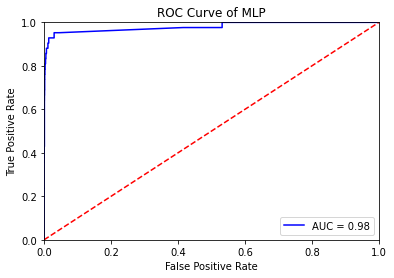

In [ ]:
y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of MLP')
plt.show()